In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
import csv
from scipy.optimize import *
from numpy.lib.recfunctions import *
from utils import *
from data import *
from graph_score import *

In [3]:
# Print data columns
x.dtype.names

('classification',
 'distance_to_port',
 'distance_to_shore',
 'measure_course_diff',
 'measure_courseavg_10800',
 'measure_courseavg_1800',
 'measure_courseavg_21600',
 'measure_courseavg_3600',
 'measure_courseavg_43200',
 'measure_courseavg_86400',
 'measure_coursestddev_10800',
 'measure_coursestddev_1800',
 'measure_coursestddev_21600',
 'measure_coursestddev_3600',
 'measure_coursestddev_43200',
 'measure_coursestddev_86400',
 'measure_distance_to_port',
 'measure_heading_diff',
 'measure_new_score_10800',
 'measure_new_score_1800',
 'measure_new_score_21600',
 'measure_new_score_3600',
 'measure_new_score_43200',
 'measure_new_score_86400',
 'measure_pos_10800',
 'measure_pos_1800',
 'measure_pos_21600',
 'measure_pos_3600',
 'measure_pos_43200',
 'measure_pos_86400',
 'measure_speed',
 'measure_speed_diff',
 'measure_speedavg_10800',
 'measure_speedavg_1800',
 'measure_speedavg_21600',
 'measure_speedavg_3600',
 'measure_speedavg_43200',
 'measure_speedavg_86400',
 'measure_spe

In [4]:
windows = [int(name[len("measure_courseavg_"):]) for name in x.dtype.names if name.startswith("measure_courseavg_")]
windows.sort()
print windows

[1800, 3600, 10800, 21600, 43200, 86400]


In [5]:
for window in windows:
    x = append_fields(x, 'measure_speedstddev_%s_log' % window, [], dtypes='<f8', fill_value=0.0)
    x['measure_speedstddev_%s_log' % window] = log10(x['measure_speedstddev_%s' % window]+0.001)

    x = append_fields(x, 'measure_coursestddev_%s_log' % window, [], dtypes='<f8', fill_value=0.0)
    x['measure_coursestddev_%s_log' % window] = log10(x['measure_coursestddev_%s' % window]+0.001)


In [6]:
windows = [43200]

In [7]:
grade = 4
colnames = []
#colnames.append("speed")
for window in windows:
    colnames.append('measure_speedavg_%s' % window)
    colnames.append('measure_speedstddev_%s_log' % window)
    colnames.append('measure_coursestddev_%s_log' % window)
    
cols = [x[col] for col in colnames]
    
score_args = curve_fit(zmpolynomial, cols, x['classification'], [1]*(len(cols)*grade))[0]

print score_args

[-125.74426718  -41.88139409   93.03579931  -59.48458422   60.9074327
  -16.663914    -11.64954788   -2.25437667   62.17203752   -7.6389589
   -7.60979765   -1.73212288]


In [15]:
try:
    x = append_fields(x, 'score', [], dtypes='<f8', fill_value=0.0)
except:
    pass

x['score'][:] = zmpolynomial(cols, *score_args)

Squared numerical error: 0.198475752903
Error (overlap): 42.2585959046%
False positives given cutoff at 0.5: 19.0685808614%
Squared numerical error: 0.10208232671
Error (overlap): 19.9971619479%
False positives given cutoff at 0.5: 18.6412764975%


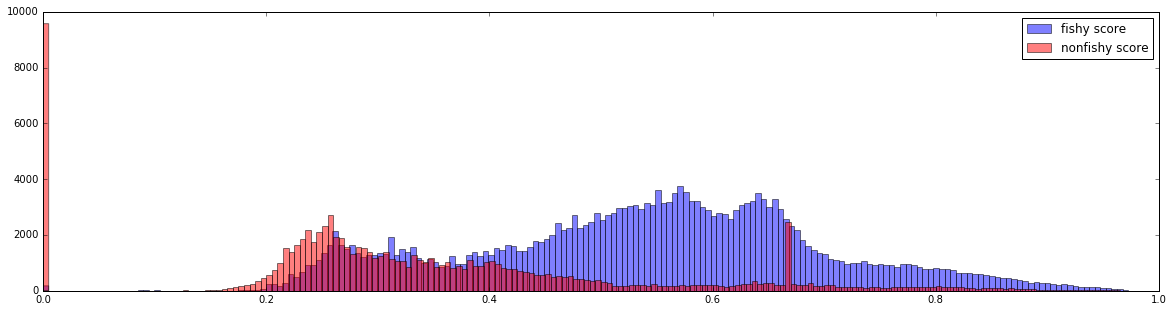

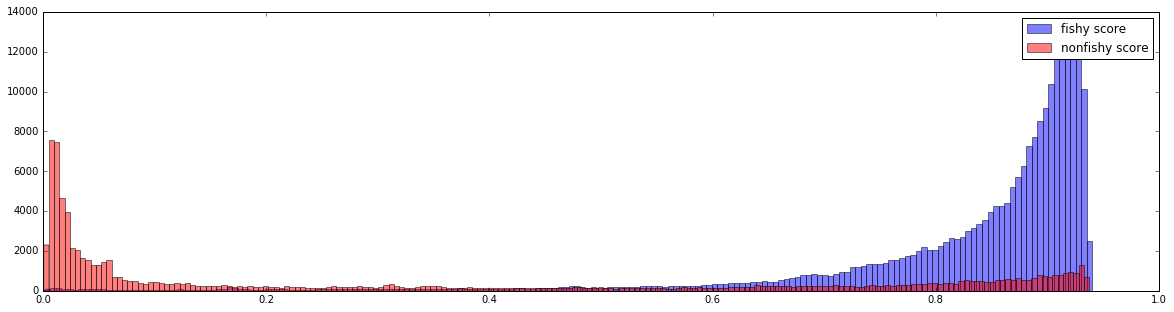

In [16]:
graph_score(x, "measure_new_score_3600")
graph_score(x, "score")


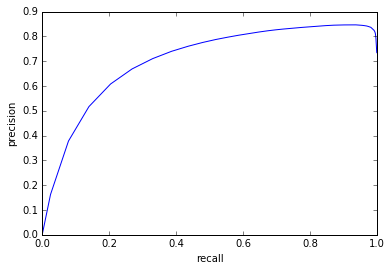

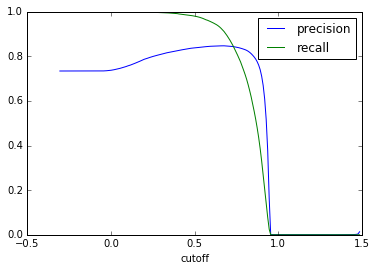

In [59]:
precall = np.zeros((len(score_fishy[0]),), dtype=[('precision', 'f8'), ('recall', 'f8')])

for cutoff in xrange(0, len(score_fishy[0])):
    positives = sum(score_fishy[0][cutoff:] + score_nonfishy[0][cutoff:])
    true_positives = sum(score_fishy[0][cutoff:])
    true = sum(score_fishy[0])

    precall['precision'][cutoff] = true_positives / positives
    precall['recall'][cutoff] = true_positives / true
    
plot(precall['recall'], precall['precision'])
plt.xlabel("recall")
plt.ylabel("precision")
show()

plot(score_fishy[1], precall['precision'], label="precision")
plot(score_fishy[1], precall['recall'], label="recall")
legend()
plt.xlabel("cutoff")
show()

<module 'graph_score' from 'graph_score.py'>